In [3]:
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.transform import rotate
import matplotlib.pyplot as plt
from skimage.feature import match_template

# Integrantes

- André Dario Pilco Chiuyare

In [4]:
url_img="14CuujPX_j2rTNcv9MeKiS1xV7dJAF4UJ"
url_waldo="15-2-9YRAAo94qA8ki80xTKWptL8mrm17"

im = imread('https://drive.google.com/uc?export=download&id={}'.format(url_img))
im_waldo = imread('https://drive.google.com/uc?export=download&id={}'.format(url_waldo))


In [5]:
def resize_img(img, new_width: int, new_heigth: int):
    return resize(img, (new_heigth, new_width), anti_aliasing=True)

In [6]:
def crop_img(img, x: tuple, y: tuple):
    return img[x[0]:x[1],y[0]:y[1],:]

In [7]:
def rotate_img(img,angle = 45):
    return rotate(img, angle=angle, resize=True)

### 1. Cargar las imágenes

In [8]:
im_waldo = resize_img(rotate_img(crop_img(im_waldo,(1000,2300),(1000,3000)),-90),50,70)
im = crop_img(rotate(resize_img(im,1500,1200),180),(0,1200),(200,1200))

In [24]:
type(im[1][1][1])

numpy.float64

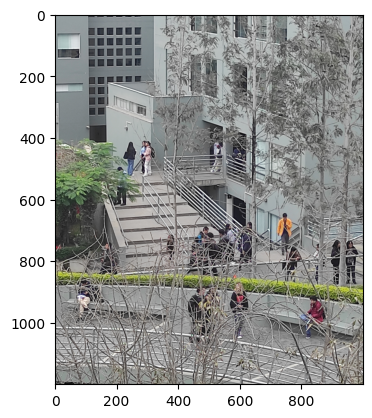

In [18]:
plt.imshow(im[:,:,])

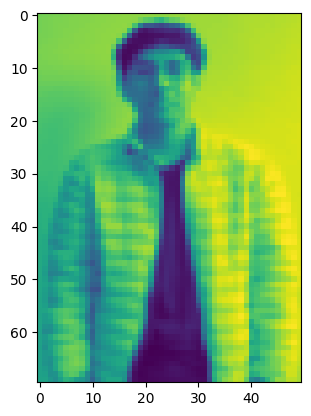

In [10]:
plt.imshow(im_waldo[:,:,0])

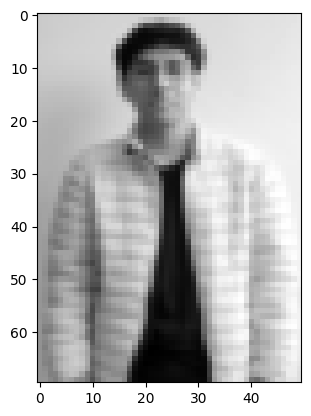

In [11]:
plt.imshow(im_waldo[:,:,0], cmap="gray")

### 3. Obtengamos el template matching

Recuede que puede usar la función `match_template`. Hint: Si queremos tener la imágen resultante del mismo tamaño de la imagen original, podemos usar `pad_input=True`

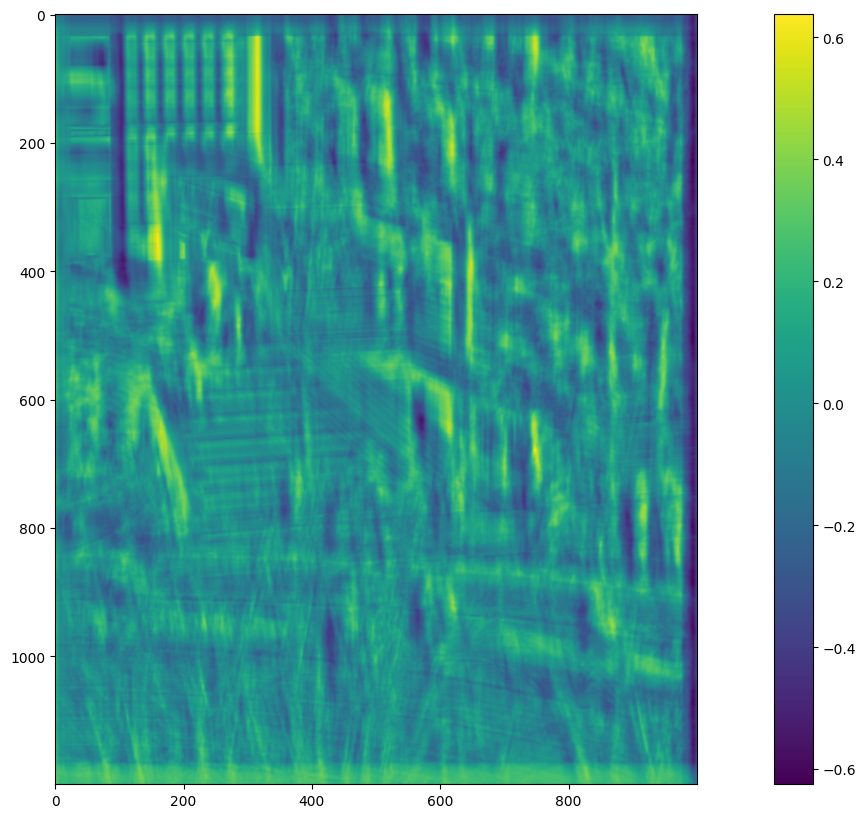

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(match_template(im[:,:,1], im_waldo[:,:,0], pad_input=True))
plt.colorbar()

### 4. Obtengamos la posición de mayor valor, y recortemos +/-100 pixeles alrededor. Mostrar la imagen

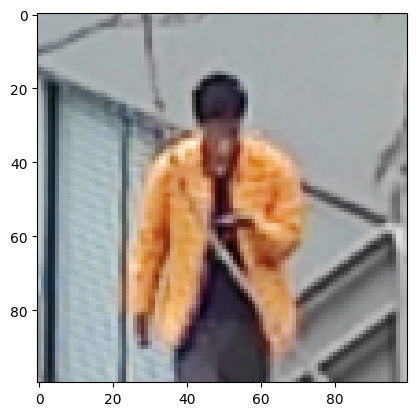

In [17]:
result = match_template(im[:,:,1], im_waldo[:,:,0], pad_input=True)
center = np.where(result == np.amax(result))
res = im[center[0][0]-50:center[0][0] + 50, center[1][0]-50:center[1][0]+50]
plt.imshow(res)